# Imports

In [1]:
# NLP packages
import nltk
from nltk.corpus import reuters, stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
# General packages
import os
import pandas as pd
import string
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Download required NLTK data
nltk.download('punkt')
nltk.download("punkt_tab")
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package punkt to /Users/sm/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /Users/sm/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/sm/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/sm/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/sm/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

# Downloading Reuters corpus

In [3]:
def load_reuters_to_dataframe():
    """
    Load all Reuters documents into a pandas DataFrame
    """
    # Get all file IDs
    file_ids = reuters.fileids()
    
    # Initialize lists to store data
    documents = []
    doc_ids = []
    categories_list = []
    
    # Extract data from each document
    for file_id in file_ids:
        try:
            # Get document text
            doc_text = reuters.raw(file_id)
            
            # Get categories for this document
            doc_categories = reuters.categories(file_id)
            
            # Store data
            documents.append(doc_text)
            doc_ids.append(file_id)
            categories_list.append(doc_categories)
            
        except Exception as e:
            print(f"Error processing {file_id}: {e}")
            continue
    
    # Create DataFrame
    df = pd.DataFrame({
        'doc_id': doc_ids,
        'text': documents,
        'categories': categories_list
    })
    
    return df

# Load the data
print("Loading Reuters corpus...")
reuters_df = load_reuters_to_dataframe()
print(f"Loaded {len(reuters_df)} documents")
print(f"DataFrame shape: {reuters_df.shape}")


Loading Reuters corpus...
Loaded 10788 documents
DataFrame shape: (10788, 3)


In [4]:
# Printing some top rows
reuters_df.head()


,doc_id,text,categories
0,test/14826,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,[trade]
1,test/14828,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,[grain]
2,test/14829,JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,"[crude, nat-gas]"
3,test/14832,THAI TRADE DEFICIT WIDENS IN FIRST QUARTER\n ...,"[corn, grain, rice, rubber, sugar, tin, trade]"
4,test/14833,INDONESIA SEES CPO PRICE RISING SHARPLY\n Ind...,"[palm-oil, veg-oil]"


In [5]:
# Printing the info
reuters_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   doc_id      10788 non-null  object
 1   text        10788 non-null  object
 2   categories  10788 non-null  object
dtypes: object(3)
memory usage: 253.0+ KB


# Text cleaning

In [6]:
# Text preprocessing functions
def clean_text(text):
    """
    Clean text by removing special characters, extra whitespace, etc.
    """
    if not isinstance(text, str):
        return ""
    
    # Remove HTML tags if any
    text = re.sub(r'<[^>]+>', '', text)
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove email addresses
    text = re.sub(r'\S+@\S+', '', text)
    
    # Remove extra whitespace and newlines
    text = re.sub(r'\s+', ' ', text)
    
    # Remove leading/trailing whitespace
    text = text.strip()
    # lower casing
    text = text.lower()
    
    return text

sample_string = "http. here    we go again!   "

clean_text(sample_string)

'here we go again!'

In [7]:
reuters_df['cleaned_text'] = reuters_df['text'].apply(
    lambda x: clean_text(x)
)

reuters_df.head()

,doc_id,text,categories,cleaned_text
0,test/14826,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,[trade],asian exporters fear damage from u.s.-japan ri...
1,test/14828,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,[grain],china daily says vermin eat 7-12 pct grain sto...
2,test/14829,JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,"[crude, nat-gas]",japan to revise long-term energy demand downwa...
3,test/14832,THAI TRADE DEFICIT WIDENS IN FIRST QUARTER\n ...,"[corn, grain, rice, rubber, sugar, tin, trade]",thai trade deficit widens in first quarter tha...
4,test/14833,INDONESIA SEES CPO PRICE RISING SHARPLY\n Ind...,"[palm-oil, veg-oil]",indonesia sees cpo price rising sharply indone...


In [8]:
reuters_df.iloc[0,1]

'ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RIFT\n  Mounting trade friction between the\n  U.S. And Japan has raised fears among many of Asia\'s exporting\n  nations that the row could inflict far-reaching economic\n  damage, businessmen and officials said.\n      They told Reuter correspondents in Asian capitals a U.S.\n  Move against Japan might boost protectionist sentiment in the\n  U.S. And lead to curbs on American imports of their products.\n      But some exporters said that while the conflict would hurt\n  them in the long-run, in the short-term Tokyo\'s loss might be\n  their gain.\n      The U.S. Has said it will impose 300 mln dlrs of tariffs on\n  imports of Japanese electronics goods on April 17, in\n  retaliation for Japan\'s alleged failure to stick to a pact not\n  to sell semiconductors on world markets at below cost.\n      Unofficial Japanese estimates put the impact of the tariffs\n  at 10 billion dlrs and spokesmen for major electronics firms\n  said they would v

In [9]:
reuters_df.iloc[0,3]

'asian exporters fear damage from u.s.-japan rift mounting trade friction between the u.s. and japan has raised fears among many of asia\'s exporting nations that the row could inflict far-reaching economic damage, businessmen and officials said. they told reuter correspondents in asian capitals a u.s. move against japan might boost protectionist sentiment in the u.s. and lead to curbs on american imports of their products. but some exporters said that while the conflict would hurt them in the long-run, in the short-term tokyo\'s loss might be their gain. the u.s. has said it will impose 300 mln dlrs of tariffs on imports of japanese electronics goods on april 17, in retaliation for japan\'s alleged failure to stick to a pact not to sell semiconductors on world markets at below cost. unofficial japanese estimates put the impact of the tariffs at 10 billion dlrs and spokesmen for major electronics firms said they would virtually halt exports of products hit by the new taxes. "we wouldn\

# nltk word tokenizer

In [10]:
# Initialize preprocessing tools
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

In [11]:


def tokenize_and_preprocess(text, remove_stopwords=True, lemmatize=True, stem=False):
    """
    Tokenize and preprocess text
    """
    if not isinstance(text, str):
        return []
    
    # Clean text
    text = clean_text(text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove punctuation and numbers
    tokens = [token for token in tokens if token.isalpha()]
    
    # Remove stop words
    if remove_stopwords:
        tokens = [token for token in tokens if token not in stop_words]
    
    # Lemmatization (preferred over stemming)
    if lemmatize:
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
    elif stem:
        tokens = [stemmer.stem(token) for token in tokens]
    
    # Remove empty tokens and short words (less than 2 characters)
    tokens = [token for token in tokens if len(token) > 1]
    
    return tokens

sample_string = "http. here    we go again in this example!   "

tokenize_and_preprocess(sample_string)

['go', 'example']

# Some EDA

In [12]:


reuters_df['tonized_words'] = reuters_df['text'].apply(
    lambda x: tokenize_and_preprocess(x, remove_stopwords=True, lemmatize=True)
)

reuters_df['word_count'] = reuters_df['tonized_words'].apply(len)

reuters_df.head()


,doc_id,text,categories,cleaned_text,tonized_words,word_count
0,test/14826,ASIAN EXPORTERS FEAR DAMAGE FROM U.S.-JAPAN RI...,[trade],asian exporters fear damage from u.s.-japan ri...,"[asian, exporter, fear, damage, rift, mounting...",419
1,test/14828,CHINA DAILY SAYS VERMIN EAT 7-12 PCT GRAIN STO...,[grain],china daily says vermin eat 7-12 pct grain sto...,"[china, daily, say, vermin, eat, pct, grain, s...",64
2,test/14829,JAPAN TO REVISE LONG-TERM ENERGY DEMAND DOWNWA...,"[crude, nat-gas]",japan to revise long-term energy demand downwa...,"[japan, revise, energy, demand, downwards, min...",104
3,test/14832,THAI TRADE DEFICIT WIDENS IN FIRST QUARTER\n ...,"[corn, grain, rice, rubber, sugar, tin, trade]",thai trade deficit widens in first quarter tha...,"[thai, trade, deficit, widens, first, quarter,...",98
4,test/14833,INDONESIA SEES CPO PRICE RISING SHARPLY\n Ind...,"[palm-oil, veg-oil]",indonesia sees cpo price rising sharply indone...,"[indonesia, see, cpo, price, rising, sharply, ...",103


## Making a plot

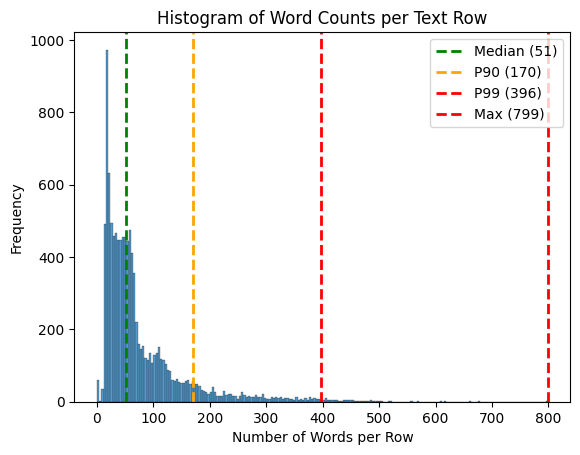

In [13]:

median_val = reuters_df["word_count"].median()
p90_val = np.percentile(reuters_df["word_count"], 90)
p99_val = np.percentile(reuters_df["word_count"], 99)
p100_val = np.percentile(reuters_df["word_count"], 100)

# Histogram of word counts
sns.histplot(reuters_df["word_count"], bins=200, kde=False)

plt.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median ({median_val:.0f})')
plt.axvline(p90_val, color='orange', linestyle='--', linewidth=2, label=f'P90 ({p90_val:.0f})')
plt.axvline(p99_val, color='red', linestyle='--', linewidth=2, label=f'P99 ({p99_val:.0f})')
plt.axvline(p100_val, color='red', linestyle='--', linewidth=2, label=f'Max ({p100_val:.0f})')

plt.xlabel("Number of Words per Row")
plt.ylabel("Frequency")
plt.title("Histogram of Word Counts per Text Row")
plt.legend()

plt.savefig('../assets/word_frequency.png', transparent=False, dpi=300, bbox_inches="tight")

plt.show()